# Pymaceuticals Inc.
---

### Analysis

In this analysis, the 45-day data was reviewed for 249 mice with SCC tumors that received different drug treatments. The main tratment focus was Capomulin. 

### Findings

The Capomulin treatment resulted in more effective results with lower tumor volumes towards the end of the research, compared to other treatments, with the exception of Ramicane, which also resulted in lower tumor volumes similar to Capomulin. There was a positive correlation between the average weight and the tumor volume, a correlation of .84, indicating that increased weight would yield in a larger tumor volume. For effective results, the suggestion would be to follow a Capomulin or Ramicane treatment. 
 

In [117]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how = 'left')

# Display the data table for preview
combined_data.head()

# Checking the number of mice.
    #below, under the preview 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [75]:
#checking for number of mice
mice_count = combined_data['Mouse ID'].nunique()
print("Number of Mice:", mice_count)

Number of Mice: 249


In [77]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [79]:
duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

# Get the duplicate mice by ID number
duplicate_mice_ids = duplicate_rows[('Mouse ID')].unique()

# Print the duplicate mice IDs
print("Duplicate mice ID:", duplicate_mice_ids)

Duplicate mice ID: ['g989']


In [80]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [105]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

new_combined_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_data['Mouse ID'])]
new_combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [106]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = new_combined_data['Mouse ID'].nunique()
print("Updated Number of Mice:", updated_mice_count)

Updated Number of Mice: 248


## Summary Statistics

In [109]:
new_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = new_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimen_median = new_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_variances = new_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_st_dev = new_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_sem = new_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_statistics = pd.DataFrame({'Mean Tumor Volume': regimen_mean,
                        'Median Tumor Volume': regimen_median,
                        'Tumor Volume Variance': regimen_variances,
                        'Tumor Volume Std Dev': regimen_st_dev,
                        'Tumor Volume Std Err': regimen_sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [118]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_2 = new_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

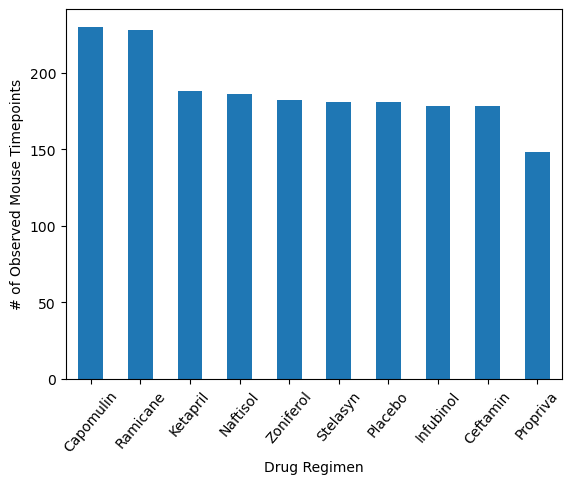

In [122]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_per_regimen = new_combined_data['Drug Regimen'].value_counts()

# Create a DataFrame from the value counts
rows_per_regimen_df = pd.DataFrame(rows_per_regimen)

# Plot the bar plot
rows_per_regimen_df.plot(kind='bar', legend=None)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=50)
plt.show()

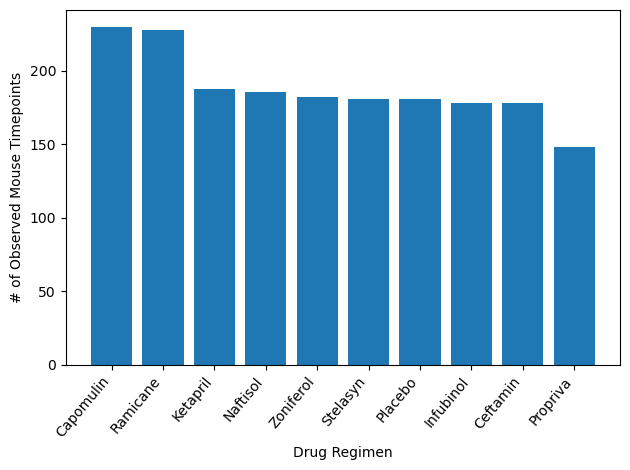

In [126]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#same as above for the rows
rows_per_regimen = new_combined_data['Drug Regimen'].value_counts()

# drug regimen names and row counts
regimen_names = rows_per_regimen.index.tolist()
row_counts = rows_per_regimen.tolist()

#bar plot using pyplot
plt.bar(regimen_names, row_counts)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Female versus Male Mice'}>

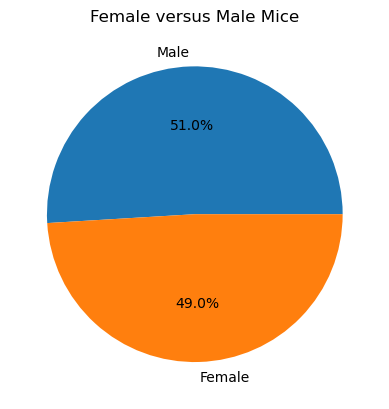

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male_distribution = new_combined_data['Sex'].value_counts()

female_male_distribution.plot(kind='pie', 
                         autopct='%1.1f%%', 
                         title='Female versus Male Mice',
                         ylabel='', xlabel='')

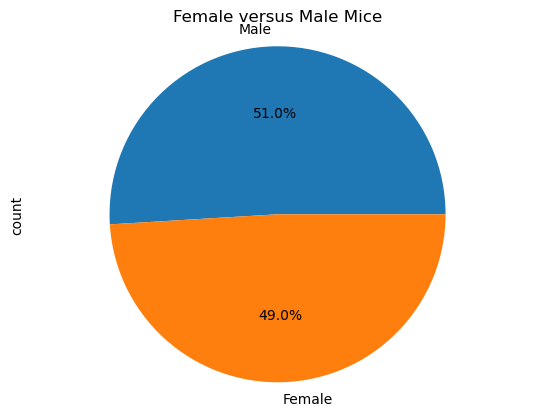

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_male_distribution = new_combined_data['Sex'].value_counts()

female_male_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Female versus Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [147]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint = combined_data.groupby('Mouse ID')['Timepoint'].max()

last_tumor_volume = pd.merge(last_timepoint, combined_data, on=['Mouse ID', 'Timepoint'], how='left')


treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_tumor_volume = last_tumor_volume[last_tumor_volume['Drug Regimen'].isin(treatment_regimens)]
last_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [148]:
# Put treatments into a list for for loop (and later for plot labels)

drug_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_treatment in drug_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_tumor_volume.loc[last_tumor_volume['Drug Regimen'] == drug_treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(tumor_vol)
    
    # quartiles and IQR
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # potential outliers
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"Potential outliers for {drug_treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


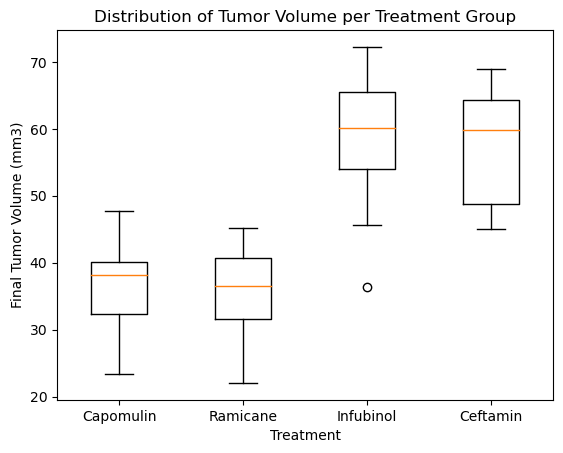

In [169]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=drug_treatments, showfliers=True)

# labels
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume per Treatment Group')
plt.show()

## Line and Scatter Plots

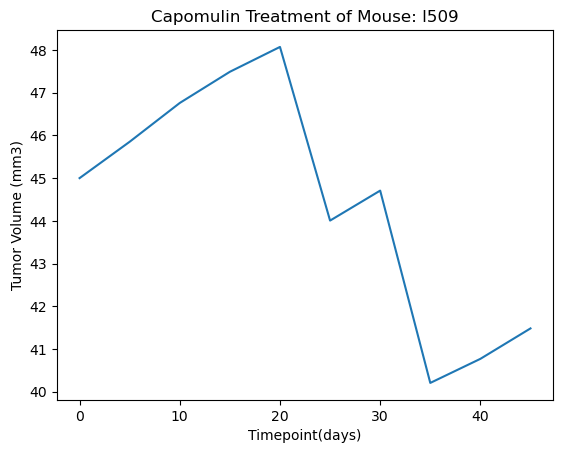

In [170]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_treatment = new_combined_data[new_combined_data['Drug Regimen'] == 'Capomulin']

# getting info for mouse id: L509
mouse_id = 'l509'
mouse_data = capomulin_treatment[capomulin_treatment['Mouse ID'] == mouse_id]

# plotting line 
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse: l509')
plt.show()

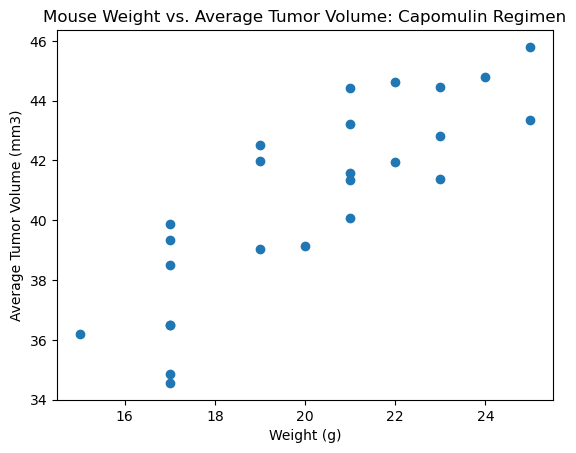

In [174]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_treatment = new_combined_data[new_combined_data['Drug Regimen'] == 'Capomulin']

# grouping data by mouse ID to calculate the average observed tumor volume for each mouse
average_tumor_vol = capomulin_treatment.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# merging average tumor volume data with the mouse weight data
combined_capomulin_data = pd.merge(average_tumor_vol, capomulin_treatment[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

# plotting scatter plit 
plt.scatter(combined_capomulin_data['Weight (g)'], combined_capomulin_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume: Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.8419363424694721


/var/folders/qw/t9kw6wr56yv7mb7ksjpk9p2w0000gn/T/ipykernel_99804/2609400881.py:8: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  slope, intercept, r_value, p_value, std_err = st.stats.linregress(combined_capomulin_data['Weight (g)'], combined_capomulin_data['Tumor Volume (mm3)'])


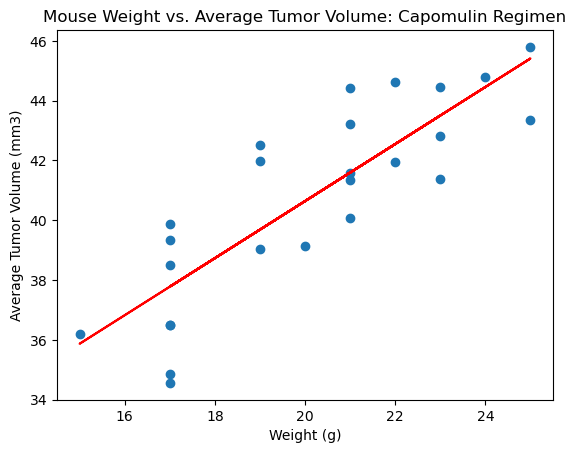

In [178]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = st.pearsonr(combined_capomulin_data['Weight (g)'], combined_capomulin_data['Tumor Volume (mm3)'])[0]
print(f'The correlation between mouse weight and the average tumor volume is: {correlation_coefficient}')

# linear regression
slope, intercept, r_value, p_value, std_err = st.stats.linregress(combined_capomulin_data['Weight (g)'], combined_capomulin_data['Tumor Volume (mm3)'])

# scatter plot
plt.scatter(combined_capomulin_data['Weight (g)'], combined_capomulin_data['Tumor Volume (mm3)'])

# Plot the regression line
plt.plot(combined_capomulin_data['Weight (g)'], slope * combined_capomulin_data['Weight (g)'] + intercept, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume: Capomulin Regimen')
plt.show()
